Задание №1

В папке находится изображение railway.jpeg с железной дорогой, уходящей вдаль от камеры. Необходимо, используя перспективное преобразование, развернуть дорогу таким образом, чтобы она была непосредственно перед нами.
Пример результата с подсказкой содержит изображение railway_result.png. Подсказка 2: чтобы было легче определять координаты ключевых точек изображения, отобразите его с помощью plt.imshow(img) (!не в ноутбуке) - в правом нижнем углу открытого окна будут отображаться координаты пикселей, на которые Вы наводите мышкой.

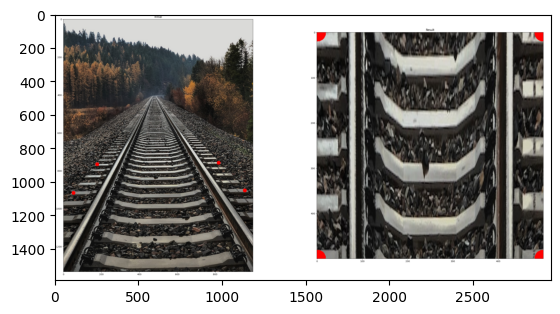

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(cv.cvtColor(cv.imread("sample_data/railway_result.png"), cv.COLOR_BGR2RGB))

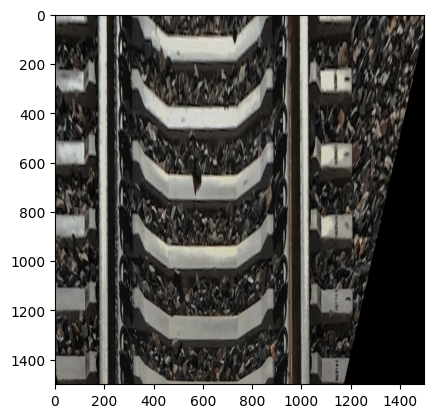

In [20]:
bgr_image = cv.imread("sample_data/railway.jpeg")
rgb_image = cv.cvtColor(bgr_image, cv.COLOR_BGR2RGB)

source_points = np.float32([
    [40, 925],
    [970, 910],
    [830, 760],
    [170, 770]
])
destination_points = np.float32([
    [0, 1200],
    [1200, 1200],
    [1200, 0],
    [0, 0]
])

transform_matrix = cv.getPerspectiveTransform(source_points, destination_points)

transformed_image = cv.warpPerspective(rgb_image, transform_matrix, (1500, 1500))

plt.imshow(transformed_image)

Задание №2

В папке находится изображение palm.png с пальмой.   Используя классические аффинные преобразования,
необходимо создать "тень" для этой пальмы и отрисовать ее с ней на одном рисунке. Пример результата находится в изображении palm_result.png


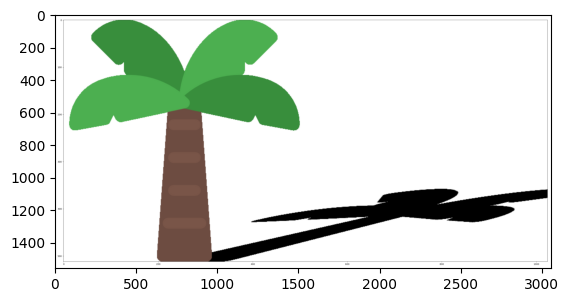

In [21]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(cv.cvtColor(cv.imread("sample_data/palm_result.png"), cv.COLOR_BGR2RGB))

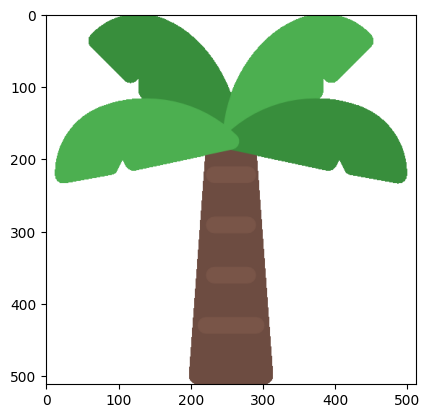

In [22]:
brg = cv.imread("sample_data/palm.png")
image = cv.cvtColor(brg, cv.COLOR_BGR2RGB)


plt.imshow(image)

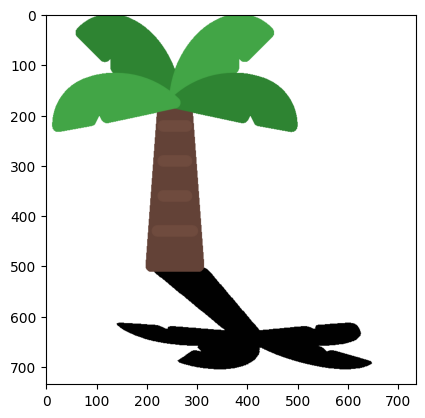

In [24]:
first_points = np.float32([
    [0, 512],
    [512, 512],
    [512, 0],
    [0, 0]
])

distX = 140
crossing = 10
second_points = np.float32([
    [150 - distX, 512 - crossing],
    [650 - distX, 512 - crossing],
    [860 - distX, 715 - crossing],
    [360 - distX, 715 - crossing],
])

gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

_, threshold = cv.threshold(gray_image, 200, 255, cv.THRESH_BINARY_INV)

contours, _ = cv.findContours(threshold, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

shadow = np.ones((735, 735, 3), dtype=np.uint8) * 255
cv.drawContours(shadow, contours, -1, (1, 1, 1), thickness=cv.FILLED)

shadow = cv.warpPerspective(
    shadow,
    cv.getPerspectiveTransform(first_points, second_points),
    (735, 735)
)

stripe_height = 30
stripe_width = 30
spacing = 30
thickness = 2
color = (50, 50, 50)
striped_image = np.copy(image)

for i in range(-stripe_height, stripe_width, spacing):
    cv.line(striped_image, (stripe_width + i, 0), (i, stripe_height), color, thickness)

canvas = np.ones((735, 735, 3), dtype=np.uint8) * 255

for i in range(735):
    for j in range(735):
        if i < 512 and j < 512 and (image[i][j] != [255, 255, 255]).all():
            canvas[i][j] = striped_image[i][j] - [10, 10, 10]
        elif (shadow[i][j] == [1, 1, 1]).all():
            canvas[i][j] = shadow[i][j]

plt.imshow(canvas)
plt.show()
